In [30]:
import numpy  as np
import pandas as pd

print('numpy  version - ' , np.__version__) 
print('pandas version - ' , pd.__version__) 

from   io import StringIO
import missingno as msno
# ml
import sklearn
from   sklearn.datasets import load_iris, load_breast_cancer

print('sklearn version - ' , sklearn.__version__)

from sklearn.model_selection import train_test_split, KFold , StratifiedKFold , cross_val_score, cross_validate, GridSearchCV 
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier         
from sklearn.linear_model    import LogisticRegression, LinearRegression


from sklearn.metrics         import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, make_scorer, precision_recall_curve
from sklearn.impute          import SimpleImputer

from sklearn.preprocessing   import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from IPython.display import Image

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

numpy  version -  1.20.3
pandas version -  1.3.4
sklearn version -  0.24.2


## Regression(회귀)
- 회귀란 종속변수(target)와 하나이상의 독립변수(feature)간의 관계를 모델링하는 선형 또는 비성현 접근법
- 예측(분류가 아닌)이고 예측을 위해서는 종속변수의 타입은 연속된 숫자이여야 한다.
- 회귀분석은 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법이다.
- Y = (w * x) + b     
- cost(w, b) - 업데이트를 통해서 예측값과 실제값의 차이를 계산
- w : weight, b : bias
- 회귀계수 : coefficients -> 독립변수가 종속변수에 미치는 영향의 강도
- 회귀유형 : 독립변수가 1개이면  단일회귀 - 선형회귀
- 회귀유형 : 독립변수가 여러개이면  다중회귀 - 비선형회귀

In [137]:
print('단일회귀 - ')
frm = pd.DataFrame({
    "height" : [1.47, 1.50, 1.52, 1.57, 1.60, 1.63, 1.66, 1.70, 1.75, 1.78, 1.82],
    "mass"   : [52.21, 53.12, 54.35, 55.53, 56.33, 57.78, 58.12, 59.36, 60.5, 61.34, 63.12]
})
frm

단일회귀 - 


,height,mass
0,1.47,52.21
1,1.50,53.12
2,1.52,54.35
3,1.57,55.53
4,1.60,56.33
5,1.63,57.78
6,1.66,58.12
7,1.70,59.36
8,1.75,60.50
9,1.78,61.34


In [138]:
print("독립변수 또는 설명변수 - ")
print('type - ',type(frm[['height']]), frm[['height']].shape)
x = frm[['height']]

독립변수 또는 설명변수 - 
type -  <class 'pandas.core.frame.DataFrame'> (11, 1)


In [139]:
print("종속변수 - ")
print('type - ',type(frm[['mass']]), frm[['mass']].shape)
y = frm[['mass']]

종속변수 - 
type -  <class 'pandas.core.frame.DataFrame'> (11, 1)


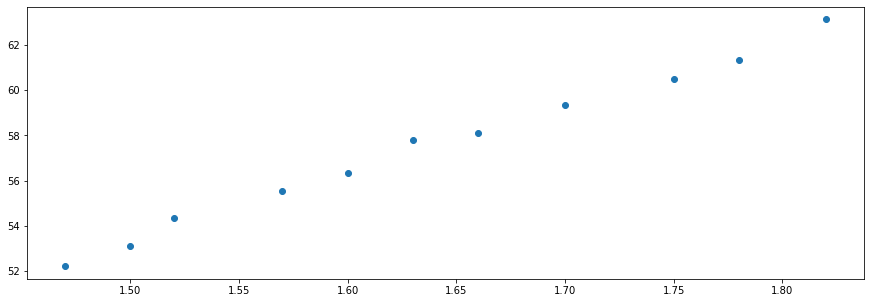

In [140]:
plt.figure(figsize=(15,5))

plt.plot(x,y,'o')

plt.show()
plt.close()

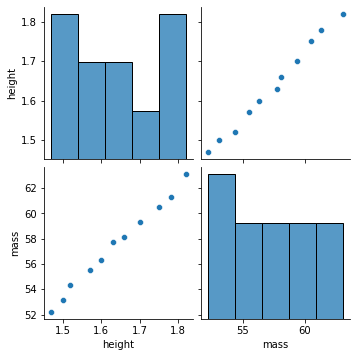

In [141]:
sns.pairplot(frm)
plt.show()
plt.close()

In [142]:
linear_model = LinearRegression()
linear_model.fit(x,y)

LinearRegression()

In [143]:
print('사용자 데이터를 입력하여 예측값을 확인 - ')
user_pred = linear_model.predict([[1.79]])
print('user pred - ',user_pred)
y_pred = linear_model.predict(x)
print('y_pred - ',y_pred)

사용자 데이터를 입력하여 예측값을 확인 - 
user pred -  [[61.98511905]]
y_pred -  [[52.50321429]
 [53.39214286]
 [53.9847619 ]
 [55.46630952]
 [56.3552381 ]
 [57.24416667]
 [58.13309524]
 [59.31833333]
 [60.79988095]
 [61.68880952]
 [62.87404762]]


In [144]:
print("w = 기울기 : ",linear_model.coef_)
print()
print("b = 절편   : ",linear_model.intercept_)

w = 기울기 :  [[29.63095238]]

b = 절편   :  [8.94571429]


In [145]:
(29.63095238 * 1.79) + 8.94571429  #위에 1.79 = user pred - [[61.98511905]]

61.9851190502

In [146]:
print("R - squared(결정계수) - ")
print()
print("R - ", linear_model.score(x,y))

R - squared(결정계수) - 

R -  0.9929305685984781


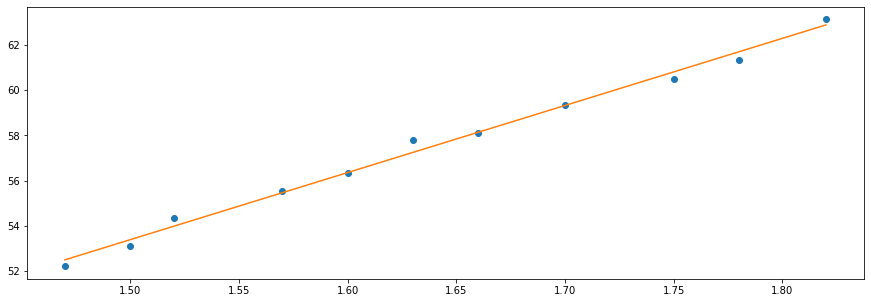

In [147]:
plt.figure(figsize=(15,5))

plt.plot(x,y,'o')
plt.plot(x,y_pred)

plt.show()
plt.close()

In [148]:
mpg_frm = pd.read_csv('./data/auto-mpg.csv', header=None)
mpg_frm.columns = ['mpg', 'cylinders', 'displacement', 'horsepower','weight', 'acc','model year', 'orgin', 'name']
mpg_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acc           398 non-null    float64
 6   model year    398 non-null    int64  
 7   orgin         398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [149]:
mpg_frm.describe()

,mpg,cylinders,displacement,weight,acc,model year,orgin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [150]:
mpg_frm['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [151]:
mpg_frm['horsepower'].replace('?',np.NaN, inplace=True)

In [152]:
mpg_frm['horsepower'].unique() # ? -> nan

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [153]:
mpg_frm.dropna(subset=['horsepower'], axis = 0, inplace = True)

In [154]:
mpg_frm['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [155]:
mpg_frm['horsepower'] = mpg_frm['horsepower'].astype('float')
mpg_frm['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [156]:
print('다중회귀 - ')
mpg_subset_frm = mpg_frm[['mpg', 'cylinders', 'horsepower','weight']]
mpg_subset_frm

다중회귀 - 


,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0
...,...,...,...,...
393,27.0,4,86.0,2790.0
394,44.0,4,52.0,2130.0
395,32.0,4,84.0,2295.0
396,28.0,4,79.0,2625.0


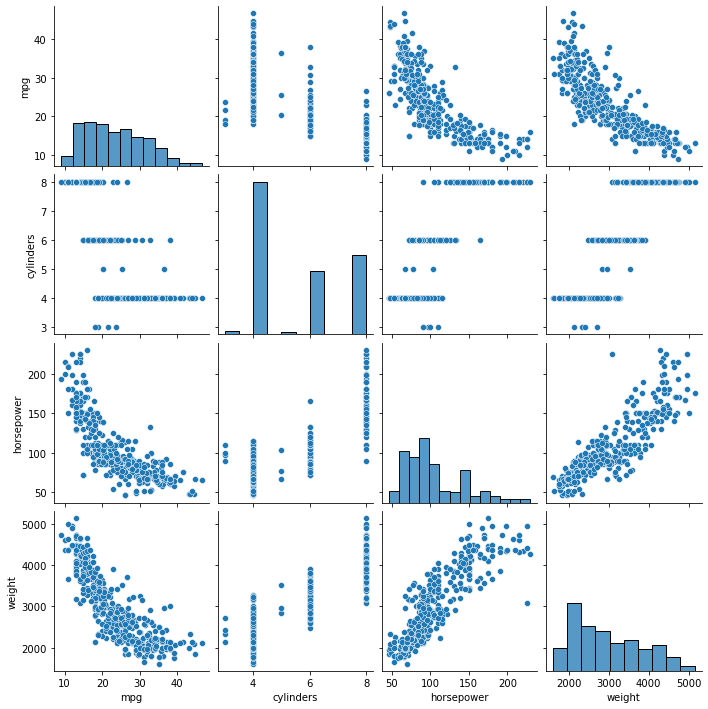

In [157]:
sns.pairplot(mpg_subset_frm)
plt.show()
plt.close()

In [158]:
print('종속변수 독립변수 분리 - ')
print('종속변수 - ')
y = mpg_subset_frm['mpg']
print('독립변수 - ')
x = mpg_subset_frm[['cylinders', 'horsepower','weight']]

종속변수 독립변수 분리 - 
종속변수 - 
독립변수 - 


In [159]:
x_train, x_test ,y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=111)
x_train.shape, x_test.shape ,y_train.shape, y_test.shape

((313, 3), (79, 3), (313,), (79,))

In [160]:
mpg_linear_model = LinearRegression()
mpg_linear_model.fit(x_train, y_train)
print("w = 기울기 : " , mpg_linear_model.coef_)
print()
print('b = 절편   : ' , mpg_linear_model.intercept_)

w = 기울기 :  [-0.15188535 -0.0589312  -0.00530238]

b = 절편   :  46.34299652357526


In [161]:
print('모델의 신뢰도 - score')
r_squared = mpg_linear_model.score(x_test, y_test)
print(r_squared)

모델의 신뢰도 - score
0.7138561071545956


In [162]:
print('예측 - ')
y_pred = mpg_linear_model.predict(x_test)
y_pred

예측 - 


array([ 5.61631879,  8.89016346, 27.2669089 , 31.88069281, 23.77003928,
       31.37849609, 30.13820164, 19.94235449, 24.98243948, 24.2272539 ,
       26.6760677 , 14.3628994 , 17.07316274, 20.29093108, 22.69518569,
       27.83696941, 29.94503882,  7.3509445 , 16.34598892, 31.76450258,
       10.44191195, 29.30572823, 25.88252605, 16.37780319, 27.60231175,
       22.823972  , 26.82150912, 26.08717864, 28.6162761 , 27.89180831,
       28.47780922, 25.22563616, 18.88732413, 12.87520827, 25.33168373,
       12.12227054, 10.13846631, 15.65137735, 26.27429701, 26.736814  ,
       27.54384265, 30.27802152, 31.33956433, 24.81158265, 24.81265568,
       27.16246498, 31.20291257, 14.08536062,  7.98722991, 22.20053528,
       33.09433243, 24.08743401, 31.36789133, 19.76371842, 32.30171496,
       26.23187798, 15.39686319, 23.21073237, 29.70643179,  7.20215875,
       20.72255209,  9.07649468, 21.84983033, 29.25544374, 20.84163046,
       28.72428171, 29.30572823, 32.68498216, 30.30150824, 32.65

In [163]:
regression_actual_guess = pd.DataFrame({
    'actual' : y_test , 
    'guess'  : y_pred
})
regression_actual_guess

,actual,guess
95,12.0,5.616319
116,16.0,8.890163
273,23.9,27.266909
195,29.0,31.880693
194,22.5,23.770039
...,...,...
251,20.2,18.006986
201,18.5,19.622083
160,17.0,18.232860
210,19.0,23.531146


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


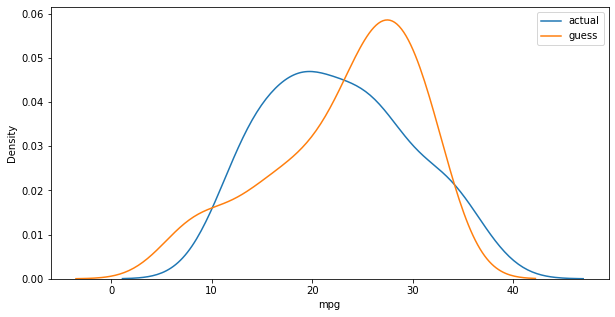

In [164]:
plt.figure(figsize=(10,5))

ax1 = sns.distplot(y_test, hist=False, label='actual')
ax1 = sns.distplot(y_pred, hist=False, label='guess')

plt.legend()
plt.show()
plt.close()

In [165]:
house_frm = pd.read_csv('data/manhattan.csv')
house_frm.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [166]:
house_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


In [167]:
house_frm.columns

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

In [219]:
x = house_frm['rent']
y = house_frm[['bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher']]

상관관계 분석을 위한 시각화 - 



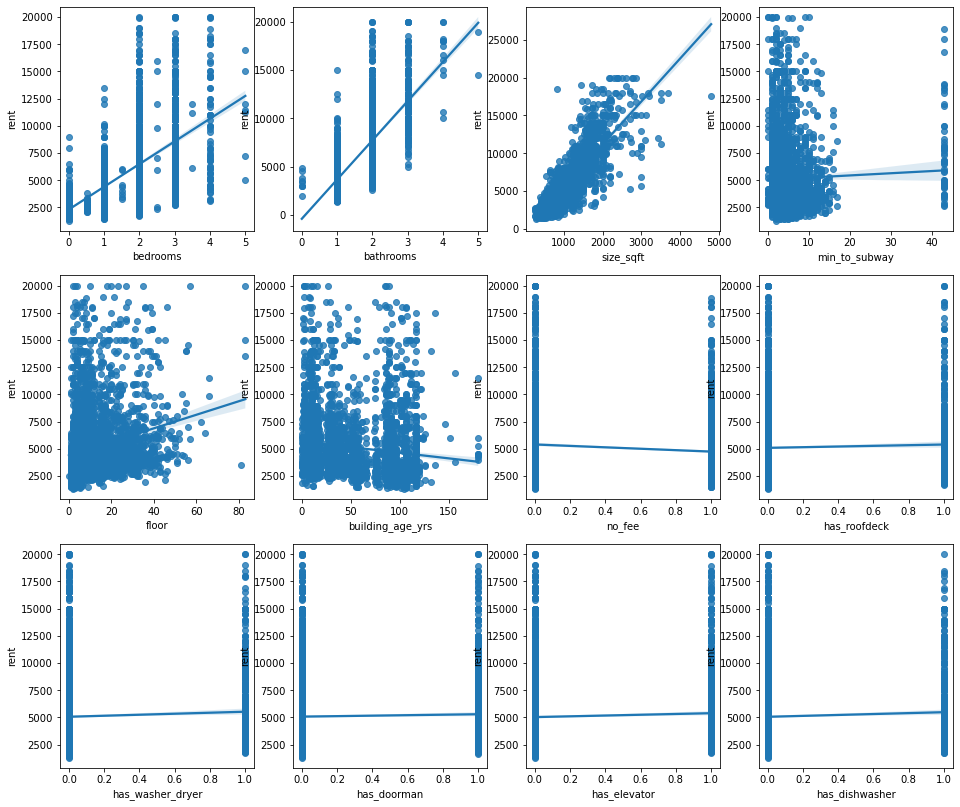

In [229]:
print('상관관계 분석을 위한 시각화 - ')
print()
fig, axs = plt.subplots(figsize=(16,14), ncols=4, nrows=3)

for idx, feature in enumerate(x):
    row = int(idx / 4)
    col = idx % 4
    sns.regplot(x=feature, y='rent', data=house_frm, ax=axs[row][col])

In [191]:
print('1. 데이터세트 분리')
print('2. 모델생성 및 학습')
print('3. 기울기 , 절편 확인')
print('4. 모델의 신뢰도(결정계수 확인)')
print('5. 사용자의 데이터를 넣어서 가격 예측')
print('6. 실제 임대료, 예측 임대료 프레임 구축')
print('7. scatter 이용해서 실제 임대료, 예측 임대료 분포를 확인!!')

1. 데이터세트 분리
2. 모델생성 및 학습
3. 기울기 , 절편 확인
4. 모델의 신뢰도(결정계수 확인)
5. 사용자의 데이터를 넣어서 가격 예측
6. 실제 임대료, 예측 임대료 프레임 구축
7. scatter 이용해서 실제 임대료, 예측 임대료 분포를 확인!!


In [221]:
print('1. 데이터세트 분리')

y = house_frm['rent']
x = house_frm[['bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher']]


1. 데이터세트 분리


In [222]:
print('2. 모델생성 및 학습')
x_train, x_test ,y_train, y_test = train_test_split(x,y,
                                                    test_size=0.2,
                                                    random_state=111)

x_train.shape, x_test.shape ,y_train.shape, y_test.shape

house_linear_model = LinearRegression()
house_linear_model.fit(x_train, y_train)

2. 모델생성 및 학습


LinearRegression()

In [223]:
print('3. 기울기 , 절편 확인')

print("w = 기울기 : " , house_linear_model.coef_)
print()
print('b = 절편   : ' , house_linear_model.intercept_)

3. 기울기 , 절편 확인
w = 기울기 :  [-304.72964384 1158.78261246    4.88315724  -18.74411341   22.70787792
   -7.81871649 -125.8524711    -8.97421713  170.5987588   -37.35605549
  -12.59523591  -15.84252636]

b = 절편   :  -351.2741267195843


In [224]:
print('4. 모델의 신뢰도(결정계수 확인)')
print('모델의 신뢰도 - score')
r_squared = house_linear_model.score(x_test, y_test)
print(r_squared)

4. 모델의 신뢰도(결정계수 확인)
모델의 신뢰도 - score
0.8023070306419079


In [225]:
print('5. 사용자의 데이터를 넣어서 가격 예측')

#[['bedrooms', 'bathrooms', 'size_sqft',
#      'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
#     'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher']]

my_apt=[[2,1,620,10,11,12,0,0,1,0,1,1]]
user_pred = house_linear_model.predict(my_apt)
print(user_pred)

y_pred = house_linear_model.predict(x_test)
y_pred

5. 사용자의 데이터를 넣어서 가격 예측
[3336.28860626]


array([ 3657.49066491,  6115.17388028,  3032.27215465,  4739.06846442,
        3655.23276625,  4757.81341682, 10624.82731375,  6926.54362484,
        2550.94573828,  3172.45498833,  3714.01267719,  2918.39749581,
        4352.4085515 ,  2811.84657123,  4875.23105977,  5647.55270666,
        3348.25411436,  9762.45861781,  3882.71023453,  2823.09604961,
        5302.05103537,  4485.035002  ,  4630.95804736,  6730.48232929,
        2832.70465671,  3969.86061267,  7769.86260241,  3211.2229926 ,
       12711.8284463 ,  2224.7717609 ,  2675.03768942,  2313.21959025,
        2373.33688126,  7995.01315031,  6255.31205115,  3866.57663633,
        7991.95227816,  3920.97508912,  5355.68893133,  8998.43856597,
        5190.40051695,  4365.00378741,  3808.56330792,  2279.07657398,
        4560.36762287,  3146.03954269,  7878.56100818,  6275.71568828,
        3944.0142973 ,  3473.35357826,  6916.52702118,  4157.81935153,
        3888.95303706,  5199.43376809,  3678.66142774,  6242.16660565,
      

In [226]:
print(type(y_test), y_test.shape)
print(type(y_pred), y_pred.shape)

<class 'pandas.core.series.Series'> (708,)
<class 'numpy.ndarray'> (708,)


In [227]:
print('6. 실제 임대료, 예측 임대료 프레임 구축')
home_actual_guess = pd.DataFrame({
    'actual' : y_test, 
    'guess'  : y_pred
})
home_actual_guess

6. 실제 임대료, 예측 임대료 프레임 구축


,actual,guess
2291,3300,3657.490665
1317,5500,6115.173880
2251,3495,3032.272155
361,4500,4739.068464
491,2900,3655.232766
...,...,...
3455,2996,2935.694948
1779,2975,3361.256813
1184,4885,4796.337196
2605,2150,2950.179581


7. scatter 이용해서 실제 임대료, 예측 임대료 분포를 확인!!


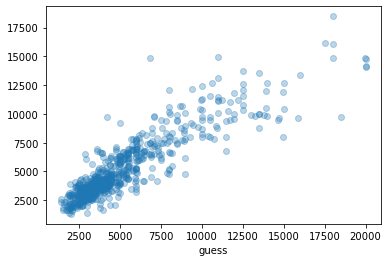

In [230]:
print('7. scatter 이용해서 실제 임대료, 예측 임대료 분포를 확인!!')
plt.scatter(y_test, y_pred, alpha=0.3)

plt.xlabel('actual')
plt.xlabel('guess')

plt.show()
plt.close()

## 성능지표

In [231]:
iris = load_iris()
print('type -',type(iris))
print('keys -',iris.keys())
print('')

type - <class 'sklearn.utils.Bunch'>
keys - dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])



In [233]:
print('종속변수 - ')
y=pd.DataFrame(iris.target, columns=['species'])
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [234]:
print('독립변수 - ')
x=pd.DataFrame(iris.data, columns=iris.feature_names)
x

독립변수 - 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [235]:
y['species'] = y['species'].replace([0,1,2],
                                    ['setosa', 'versicolor', 'vriginica'])
iris_frm = pd.concat([x,y], axis= 1)
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,vriginica
146,6.3,2.5,5.0,1.9,vriginica
147,6.5,3.0,5.2,2.0,vriginica
148,6.2,3.4,5.4,2.3,vriginica


In [236]:
iris_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


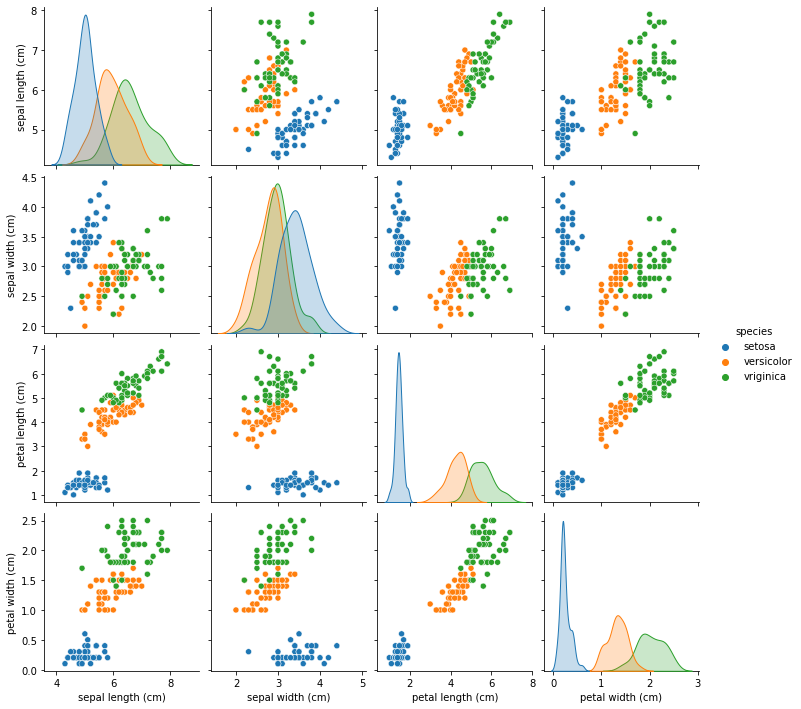

In [238]:
sns.pairplot(iris_frm, hue='species')

In [278]:
iris_frm['species'] = iris_frm['species'].replace(['setosa', 'versicolor', 'vriginica'],
                                                  [0,1,2])
iris_frm.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [279]:
print('종속변수 - ')
y = iris_frm['sepal length (cm)'] 
print('독립변수 - ')
x = iris_frm.drop('sepal length (cm)', axis =1) 

종속변수 - 
독립변수 - 


In [280]:
iris_model = LinearRegression()
iris_model.fit(x,y)

LinearRegression()

In [281]:
r_squared = iris_model.score(x,y)
r_squared

0.8621931701975809

In [282]:
user_pred = iris_model.predict([[4.3, 1.3, 0.2, 1]])
user_pred

array([5.19844701])

In [283]:
x_train, x_test ,y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=111)
x_train.shape, x_test.shape ,y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [284]:
iris_model = LinearRegression()
iris_model.fit(x_train, y_train)

LinearRegression()

In [285]:
r_squared = iris_model.score(x_train,y_train)
r_squared

0.8554013231376049

In [286]:
y_pred = iris_model.predict(x_test)
iris_actual_guess = pd.DataFrame({
    'actual_sepal_length' : y_test, 
    'guess_sepal_length'  : y_pred
})
iris_actual_guess

,actual_sepal_length,guess_sepal_length
39,5.1,4.991261
26,5.0,4.999025
109,7.2,7.195571
123,6.3,5.954416
77,6.7,6.600604
24,4.8,5.303315
0,5.1,4.974455
139,6.9,6.483938
144,6.7,6.699894
56,6.3,6.585310


In [287]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [290]:
print('성능평가 지표 - ')
print()
print('mae  - ',mean_absolute_error(y_test, y_pred))
print('mse  - ',mean_squared_error(y_test, y_pred))
print('rmse - ',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R    - ',iris_model.score(x_test, y_test))

성능평가 지표 - 

mae  -  0.23689300207713843
mse  -  0.08608966103496234
rmse -  0.2934103969442159
R    -  0.8779831575882424
